# TP4 

## Descente de gradients

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1
Ecrire une fonction python qui implémente la descente de gradient pour une fonction d'une variable. Votre fonction aura en entrée:
- x0: le point initial
- df: la formule de la dérivée de la fonction d'une variable
- dt: le pas de discrétisation
- nmax: le nombre maximal d'itérations
- epsilon: la tolérance
Et renverra en sortie les différentes valeurs de $x_k$ au cours des itérations

In [2]:
def descenteGradient1D(x0,df,dt,nmax,epsilon=0.001):
    xlist = np.array(())
    cur_x = x0
    for i in range(nmax):        
        xlist = np.append(xlist,cur_x)
        prev_x = cur_x
        cur_x = cur_x - dt*df(cur_x)
        if(np.abs(cur_x-prev_x)<epsilon):
            return xlist
    return xlist

### Question 2
Tester votre algorithme avec la fonction du cours, différentes conditions intiales et valeurs de dt.
Illustrer chaque test par une figure montrant la fonction et la succession des points.

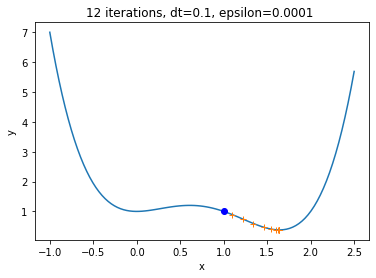

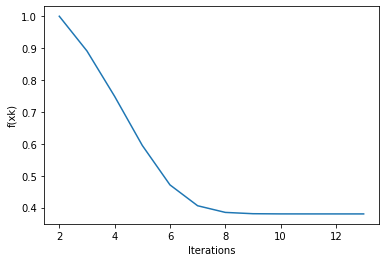

In [9]:
# Declaring function and derivativative
def f(u):
    return u**4 - 3*u**3 + 2*u**2 +1

def df(u):
    return 4*u**3 - 9*u**2 + 4*u

# Generating list of points from gradient descent
x = descenteGradient1D(1,df,0.1,12,0.0001)

# creating linear space to plot function
xlist = np.linspace(-1,2.5,100)

# Plot function and gradient descent points
plt.plot(xlist,f(xlist))
plt.title("12 iterations, dt=0.1, epsilon=0.0001 ")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[0],f(x)[0],'bo')
plt.plot(x[1:],f(x)[1:],'+')

# Plot cenvergence to iterations
iterations = np.arange(1,14)
plt.figure()
plt.xlabel("Iterations")
plt.ylabel("f(xk)")
plt.plot(iterations[1:13],f(x))
plt.show()


### Question 3
Reprendre la question 1 pour une fonction de deux variables. p0 désigne ici les coordonnées du point de départ.

In [10]:
# Using a euclidean distance to compare points
def calculateDistance(x1,y1,x2,y2):  
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2) 

# Gradient descent in bi-dimentional functions
def descenteGradient2D(p0,df,dt,nmax,epsilon):
    
    # Allocating point list
    plist = np.zeros((nmax,2))
    
    # Setting starting point from arguments
    cur_p = p0
    
    for i in range(nmax):
        
        # Add current point to point list
        plist[i][0] = cur_p[0]
        plist[i][1] = cur_p[1]
        
        # Keep point coordinates
        a = cur_p[0]
        b = cur_p[1]
        
        # Calculate gradient 
        grad = df(cur_p[0],cur_p[1])
        
        # Set next point as current
        cur_p[0] = cur_p[0] - (dt*grad[0])
        cur_p[1] = cur_p[1] - (dt*grad[1])
        
        # If distance between points < error -> return
        if(calculateDistance(cur_p[0],cur_p[1],a,b)<epsilon):
            return plist
    return plist

### Question 4
Tester l'algorithme avec la fonction $(x,y)\mapsto x^2+2y^2 $ et la fonction de Rosenbrock. Illustrer les résultats en utilisant la fonction contour de pyplot.

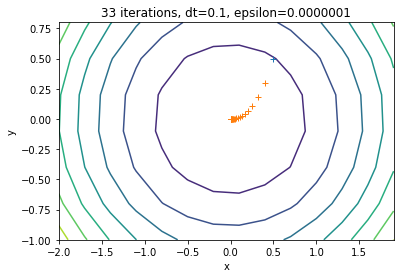

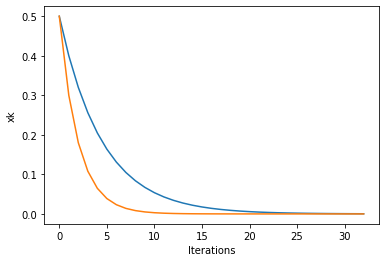

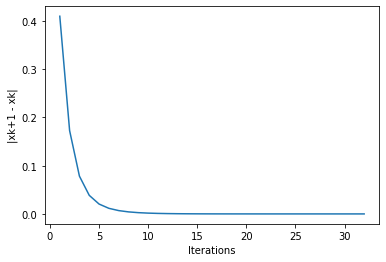

In [14]:
# Define function and gradient 
def f2d(u,v):
    return u**2 + 2*v**2

def der_f2d(u,v):
    grad = np.zeros(2)
    grad[0] = u*2
    grad[1] = 4*v
    return  grad

# Set starting point
p0 = np.array([0.5,0.5])

# Generate point list using gradient descent
p = descenteGradient2D(p0,der_f2d,0.1,33,0.0000001)
#plist = np.linspace(-1,2.5,100)

# Create meshgrid for 3d projection
h = 0.3
x = np.arange(-2, 2, h)
y = np.arange(-1, 1, h)


# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')

iterations = np.arange(1,33)

plt.figure()
plt.contour(xx,yy,f2d(xx,yy))
plt.title("33 iterations, dt=0.1, epsilon=0.0000001")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(p[0,0],p[0,1],'+')
plt.plot(p[1:,0],p[1:,1],'+')


plt.figure()
plt.plot(p)
plt.xlabel("Iterations")
plt.ylabel("xk")


plt.figure()
plt.plot(iterations,np.abs(np.diff(f2d(p[:,0],p[:,1]))))
plt.xlabel("Iterations")
plt.ylabel("|xk+1 - xk|")
plt.show()

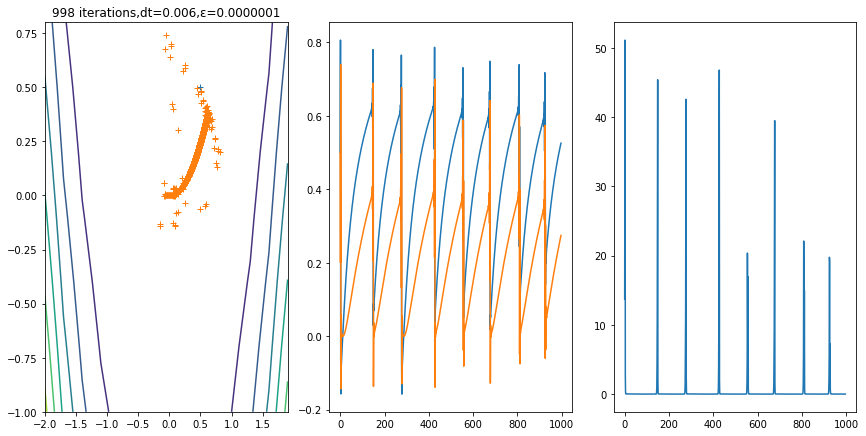

In [16]:
# Defining Rosenbrock function with a = 1 , b=100

def rosenbrock(u,v):
    return (u-1)**2 + 100*(v - u**2)**2

def grad_rosen(u,v):
    grad = np.zeros(2)
    grad[0] = 400*u**3-400*u*v+ 2*u-2
    grad[1] = 200*(v-u**2)
    return  grad

# Setting starting point
p0 = np.array([0.5,0.5])

# Generating points using gradient descent
p = descenteGradient2D(p0,grad_rosen,0.006,998,0.0000001)

# Create meshgrid for surface projection
h = 0.3
x = np.arange(-2, 2, h)
y = np.arange(-1, 1, h)


# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')

iterations = np.arange(1,33)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,6))
fig.tight_layout()

ax1.contour(xx,yy,rosenbrock(xx,yy))
ax1.set_title("998 iterations,dt=0.006,ε=0.0000001")
ax1.plot(p[0,0],p[0,1],'+')
ax1.plot(p[1:,0],p[1:,1],'+')


ax2.plot(p)


ax3.plot(np.abs(np.diff(rosenbrock(p[:,0],p[:,1]))))
plt.show()